In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [2]:
RANDOM_STATE = 1

In [3]:
df = pd.read_excel('X_bp.xlsx', index_col=0)

In [4]:
df1 = pd.read_excel('X_nup.xlsx', index_col=0)
df = df.merge(df1, left_index=True,right_index=True, how='inner')

In [5]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [6]:
df.drop_duplicates() 

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [7]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [8]:
#sns.pairplot(df, diag_kind = 'hist', kind = 'scatter')

In [9]:
df.columns


Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [10]:
#fig = plt.figure()
#for i in range(df.shape[1]-1):
    # fig.add_subplot(5, 2, i+1)

In [11]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [12]:
#for i in range(df.shape[1]):
    #fig = plt.figure()
    #plt.boxplot(df.values[:,i])

In [13]:
def plotv(i):
    #x = (df.values[:,i] - df.values[:,i].mean()) / df.values[:,i].std()
    #plt.scatter(range(len(df.values[:,i])), df.values[:,i],c=x > 3)
    lq = df.iloc[:,i].quantile(0.25)
    uq = df.iloc[:,i].quantile(0.75)
    iqr = uq - lq
    lower_bound = lq - 1.5 * iqr
    upper_bound = uq + 1.5 * iqr
    lim = (df.iloc[:,i] <= lower_bound) | (df.iloc[:,i] >= upper_bound)
    #plt.scatter(range(len(df.values[:,i])), df.values[:,i],c = lim)
    return lim

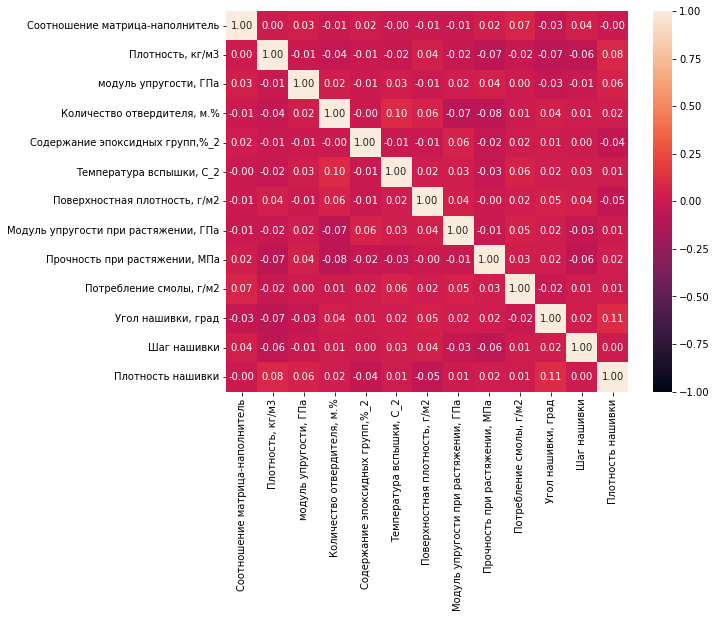

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', ax=ax)
plt.show()

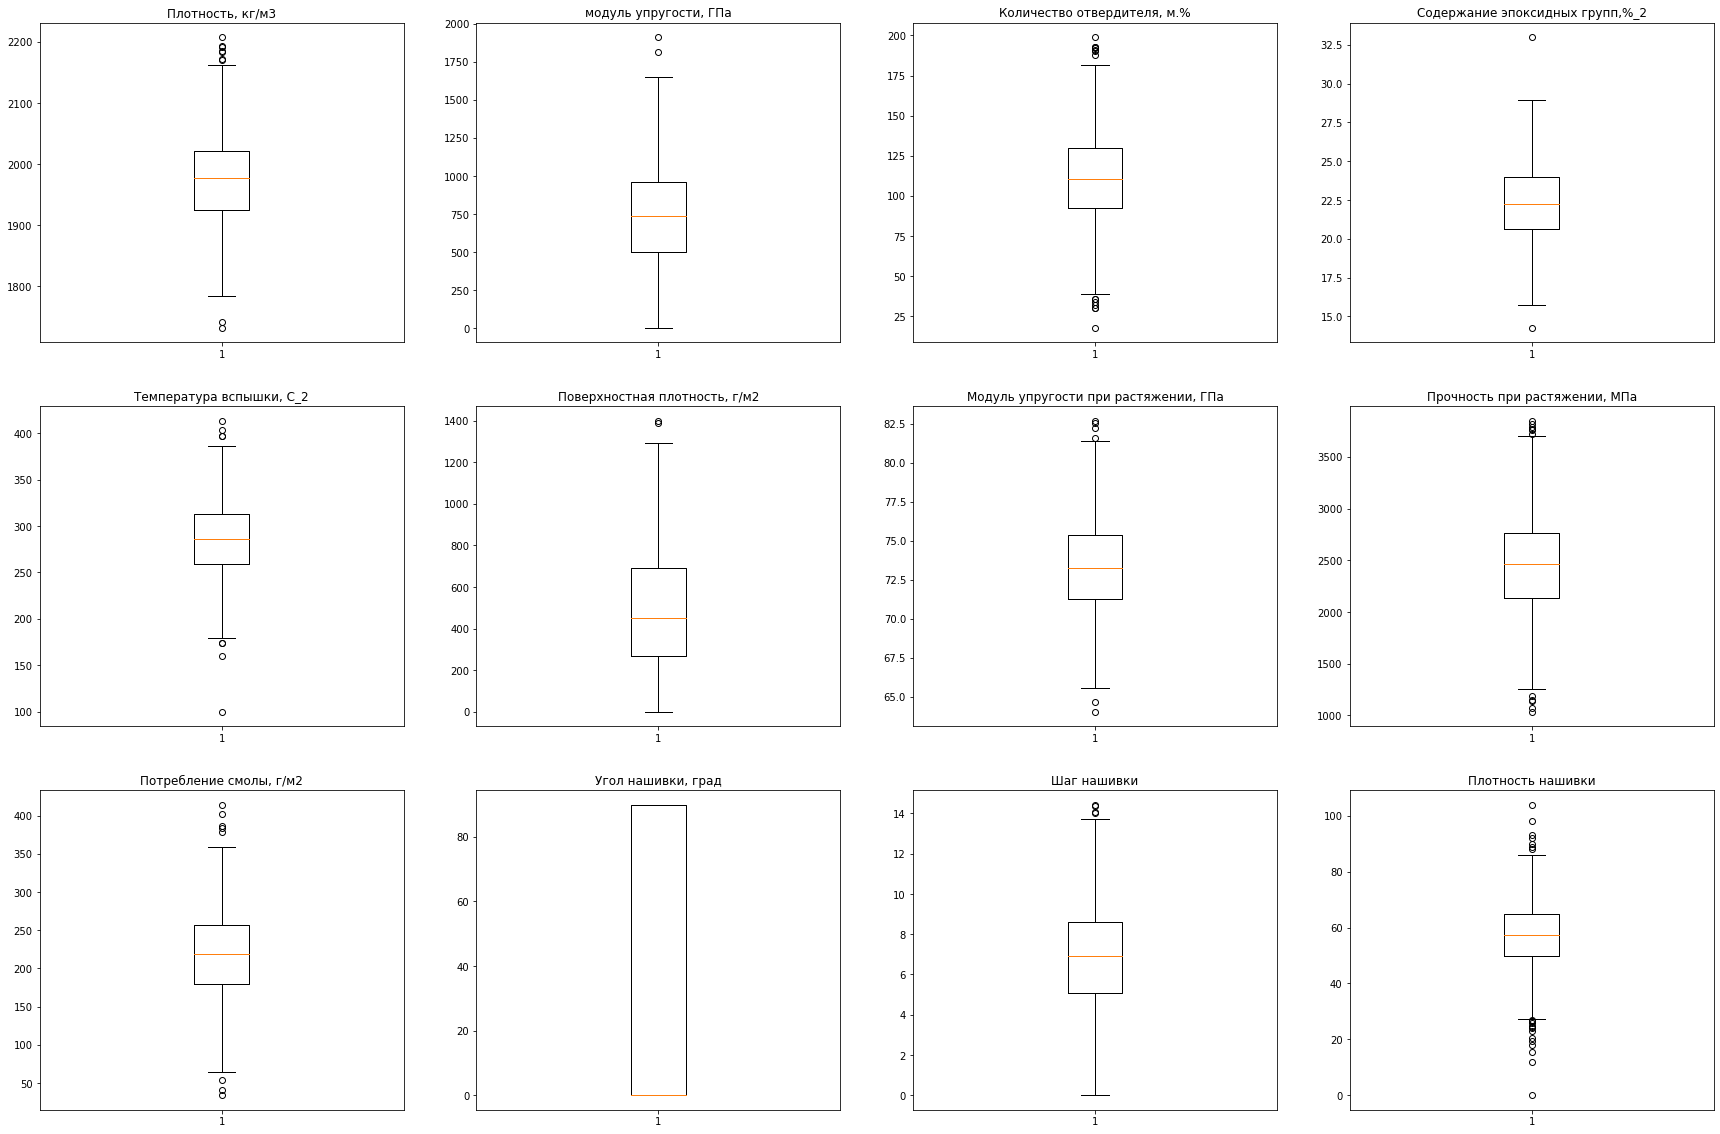

In [15]:
plt.figure(figsize=(30, 20))
for i in range(1,df.shape[1]):
    plt.subplot(3, 4, i)
    plt.boxplot(df.values[:,i])
    plt.title(df.columns[i])

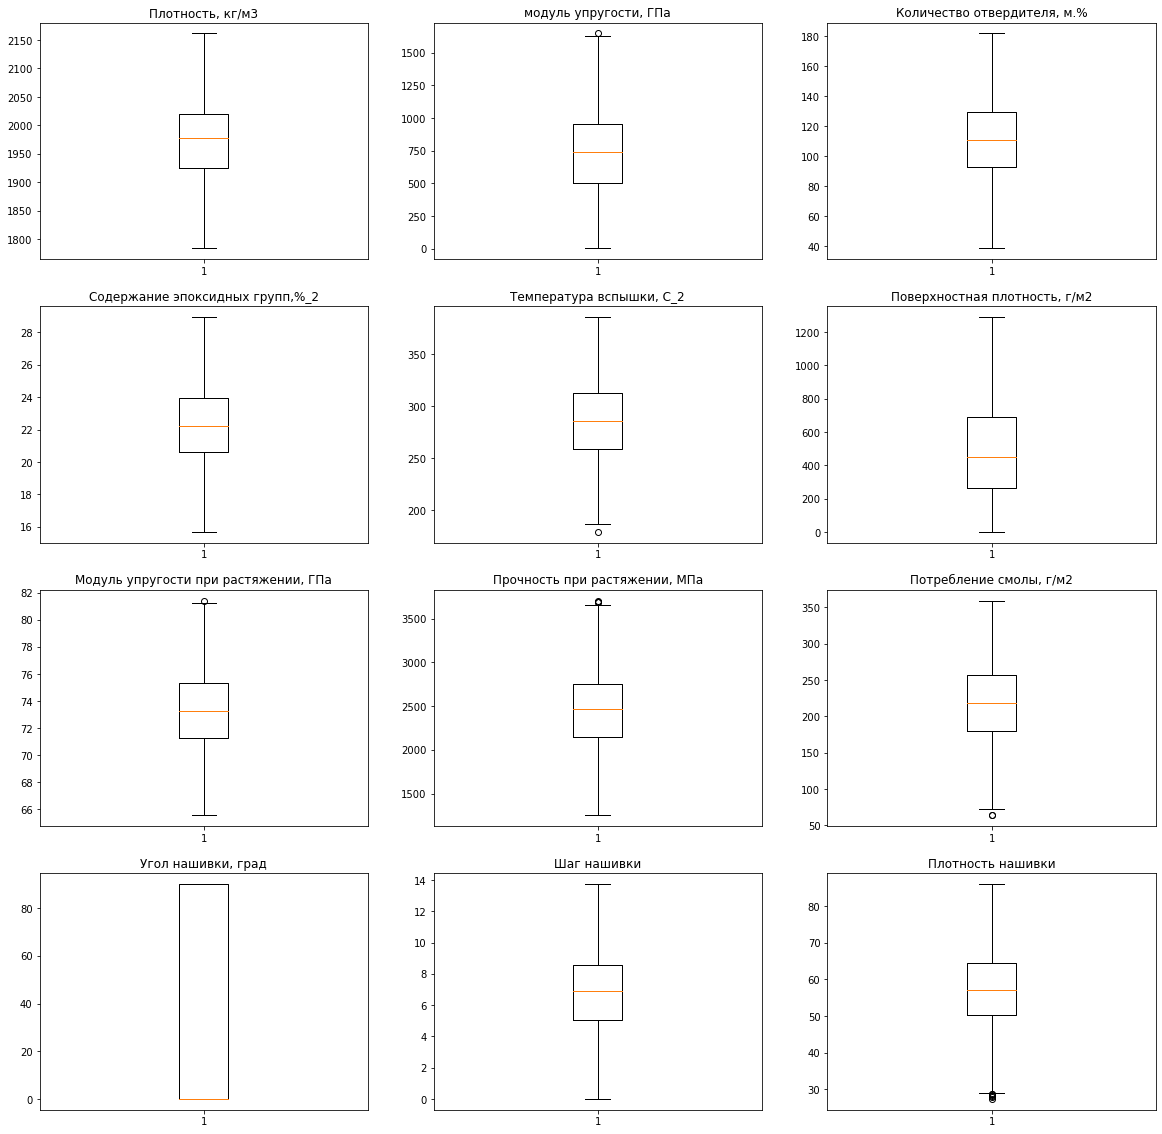

In [16]:
plt.figure(figsize=(20, 20))
for i in range(1,df.shape[1]):
    lim = plotv(i)
    df.iloc[lim,i]=df.iloc[:,i].mean()
    #df.iloc[lim,i]=np.nan
    #df = df.interpolate(method ='linear', limit_direction ='backward')
    plt.subplot(4, 3, i)
    plt.boxplot(df.values[:,i])
    plt.title(df.columns[i])

In [17]:
st = df.describe().loc[['min', 'max', 'mean', 'std'], :]
st.loc['mediana',:] = df.median()
st.T.style.format(precision=3)

,min,max,mean,std,mediana
Соотношение матрица-наполнитель,0.389,5.592,2.930,0.913,2.907
"Плотность, кг/м3",1784.482,2161.565,1974.764,70.843,1977.113
"модуль упругости, ГПа",2.437,1649.416,737.726,326.454,739.664
"Количество отвердителя, м.%",38.669,181.828,110.558,26.662,110.571
"Содержание эпоксидных групп,%_2",15.696,28.955,22.242,2.370,22.231
"Температура вспышки, С_2",179.374,386.068,285.949,39.356,285.882
"Поверхностная плотность, г/м2",0.604,1291.340,480.948,278.397,451.864
"Модуль упругости при растяжении, ГПа",65.553,81.417,73.311,3.043,73.284
"Прочность при растяжении, МПа",1250.393,3705.673,2465.782,465.480,2462.605
"Потребление смолы, г/м2",63.686,359.052,218.084,57.682,218.423


In [18]:
scaler = MinMaxScaler()

dfn=pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index) 


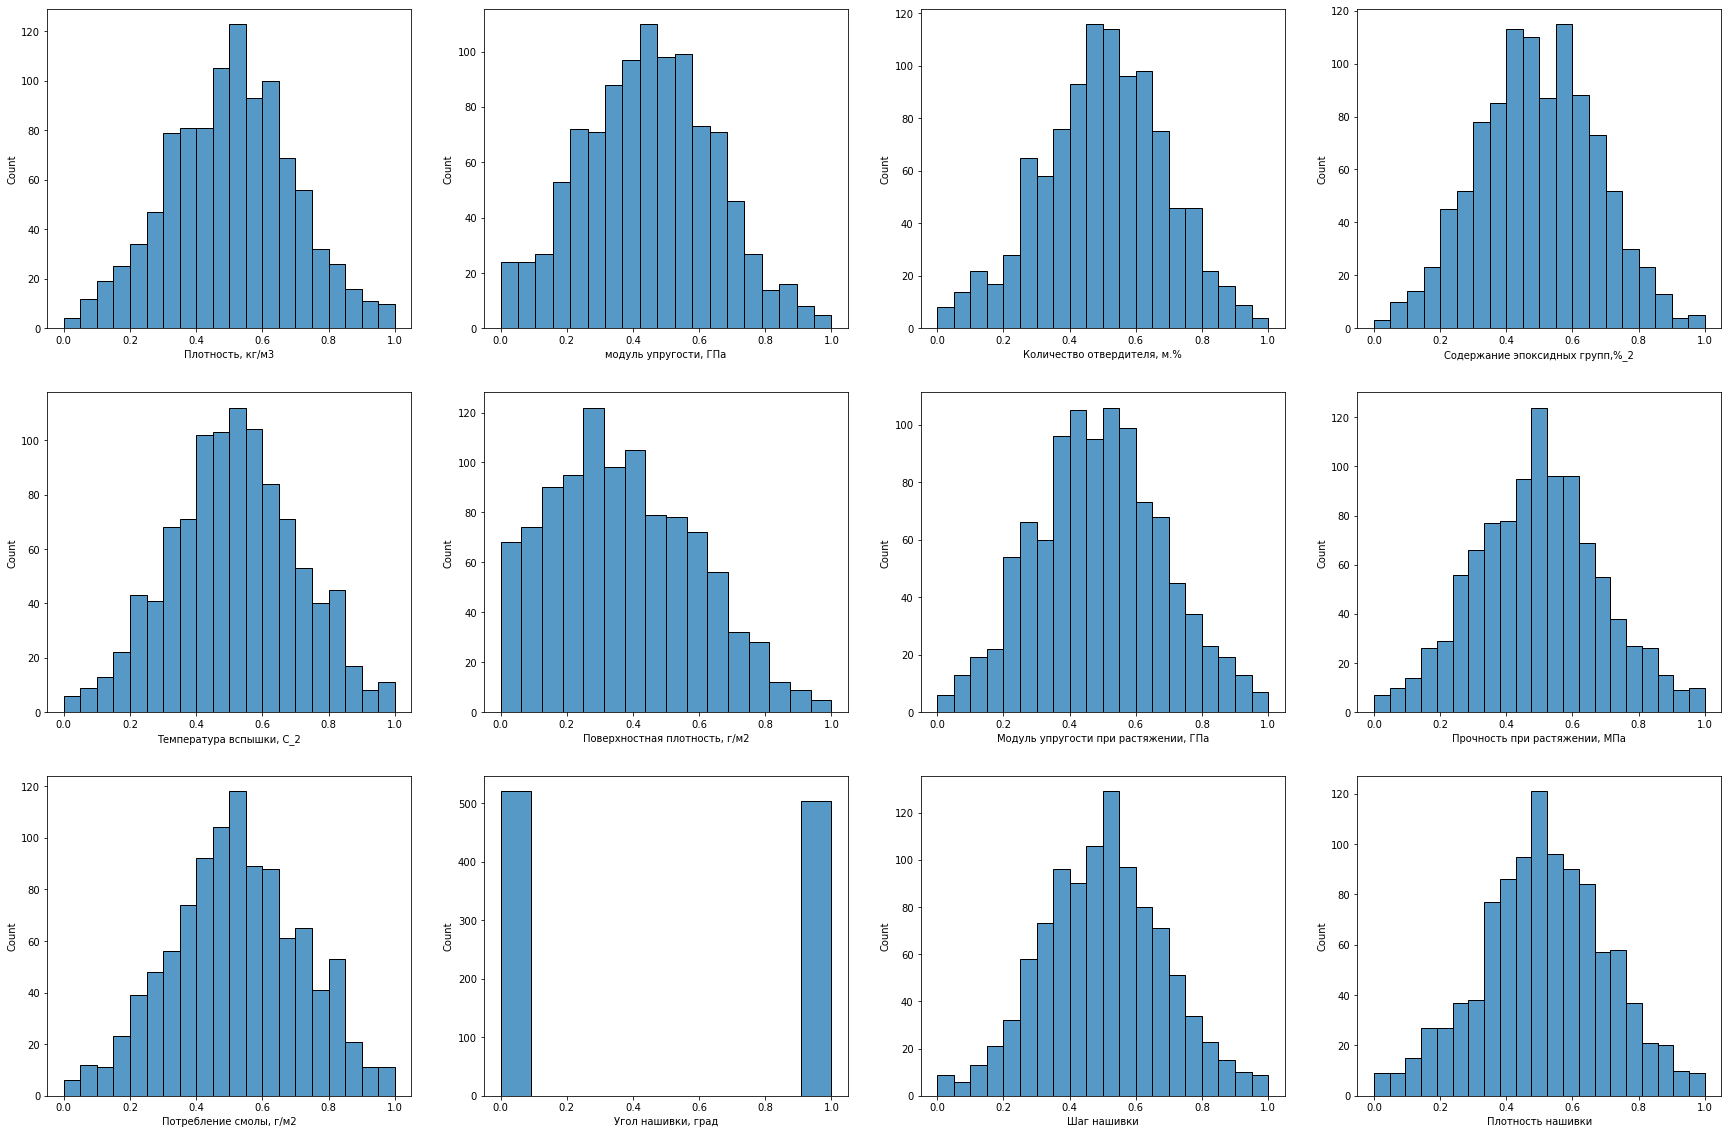

In [19]:
plt.figure(figsize=(30, 20))
for i in range(1,df.shape[1]):
    plt.subplot(3, 4, i)
    sns.histplot(data=dfn.iloc[:, i], x=dfn.iloc[:, i], multiple='stack', legend=False)
    

In [20]:
dfc = dfn.copy()
train = dfc.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Соотношение матрица-наполнитель'])
target = dfc[['Модуль упругости при растяжении, ГПа',  'Прочность при растяжении, МПа']]

Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

In [21]:
def get_metric(Ytest, pred):
    m = np.array([(np.sqrt(mean_squared_error(Ytest, pred, multioutput = "raw_values"))),
    r2_score(Ytest, pred, multioutput = "raw_values"),
    mean_absolute_percentage_error(Ytest, pred, multioutput = "raw_values")])
    return m

In [22]:

from sklearn.linear_model import BayesianRidge
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state = RANDOM_STATE),
    'Lasso': Lasso(random_state = RANDOM_STATE)
}

modelssvr = {
    'BRidge': BayesianRidge(),
    'SVR_poly': SVR(kernel="poly", degree=3),
    'SVR_rbf':  SVR(kernel="rbf"),
    'SVR_sig':  SVR(kernel="sigmoid"),
    
}


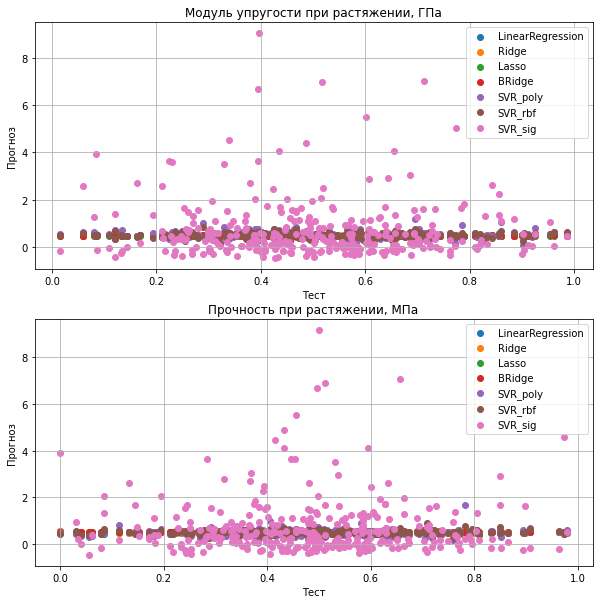

In [23]:

staty = pd.DataFrame()
statp = pd.DataFrame()

#poly_reg = PolynomialFeatures(degree=4)
#X_poly = poly_reg.fit_transform(Xtrn)
#lin_reg2 = LinearRegression()
#lin_reg2.fit(X_poly,Ytrn)
#X_p = poly_reg.fit_transform(Xtest)
#pred = lin_reg2.predict(X_p)

plt.figure(figsize = [10,10])
for name, model in models.items():
    model.fit(Xtrn, Ytrn)
    pred = model.predict(Xtest)
    m = get_metric(Ytest, pred)
    staty.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
    statp.loc[name, ['rmse', 'r2', 'mape']] =m[:,1]
    plt.subplot(2,1,1)
    plt.title(Ytest.columns[0])
    #plt.scatter(Ytest.values[:,0], pred[:,0], label = Ytest.columns[0])
    #plt.scatter(Ytest.values[:,1], pred[:,1], label = Ytest.columns[1])
    plt.scatter(Ytest.values[:,0], pred[:,0], label = name)
    plt.ylabel('Прогноз')
    plt.xlabel('Тест')
    plt.legend()
    plt.grid(True)
    plt.subplot(2,1,2)
    plt.title(Ytest.columns[1])
    #plt.scatter(Ytest.values[:,0], pred[:,0], label = Ytest.columns[0])
    #plt.scatter(Ytest.values[:,1], pred[:,1], label = Ytest.columns[1])
    plt.scatter(Ytest.values[:,1], pred[:,1], label = name)
    plt.ylabel('Прогноз')
    plt.xlabel('Тест')
    plt.legend()
    plt.grid(True)   
    
for name, model in modelssvr.items():
    for i in range(2):
        pred = model.fit(Xtrn, Ytrn.iloc[:,i]).predict(Xtest)
        m = get_metric(Ytest.iloc[:,i], pred)
        if i == 0:
            staty.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
        else:
            statp.loc[name, ['rmse', 'r2', 'mape']] =m[:,0]
        plt.subplot(2,1,i+1)
        plt.title(Ytest.columns[i])
        plt.scatter(Ytest.values[:,i], pred, label = name)
        plt.ylabel('Прогноз')
        plt.xlabel('Тест')
        plt.legend()
        plt.grid(True)


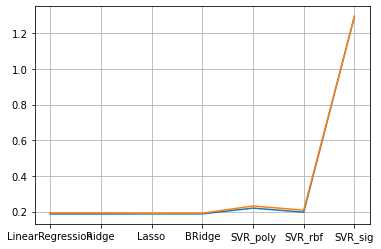

In [24]:
plt.plot(statp["rmse"])
plt.plot(staty["rmse"])
plt.grid(True)


In [25]:
statp

,rmse,r2,mape
LinearRegression,0.186178,-0.002433,8.131257e+12
Ridge,0.186112,-0.001732,8.100084e+12
Lasso,0.186801,-0.009154,7.339980e+12
BRidge,0.186714,-0.008219,7.364715e+12
SVR_poly,0.219037,-0.387509,7.113957e+12
SVR_rbf,0.196473,-0.116363,6.513656e+12
SVR_sig,1.294268,-47.445048,5.697661e+13


In [26]:
staty

,rmse,r2,mape
LinearRegression,0.192716,-0.028337,0.554830
Ridge,0.192549,-0.026563,0.554193
Lasso,0.190421,-0.003994,0.541692
BRidge,0.190741,-0.007370,0.544837
SVR_poly,0.231073,-0.478430,0.645047
SVR_rbf,0.207770,-0.195272,0.599525
SVR_sig,1.293042,-45.294149,2.112617


# Настройка

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
params = {'alpha': [0.01, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0]}
search = GridSearchCV(Lasso(), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn)
model_best_Lasso = search.best_estimator_
print(search.best_estimator_)

Lasso(alpha=0.01)


In [29]:
 
params = {'alpha': [0.01, 0.1, 1, 50, 500, 1500]}
search = GridSearchCV(Ridge(), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn)
model_best_Ridge = search.best_estimator_
print(search.best_estimator_)

Ridge(alpha=1500)


In [30]:
params = {'degree' : [1,2,3,4,5, 6]}
          
search = GridSearchCV(SVR(kernel = 'poly', gamma ='auto'), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,0])
model_best_SVRpoly_y = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)

SVR(degree=2, gamma='auto', kernel='poly')
-0.19220566973261505


In [31]:
params = {'degree' : [1,2,3,4,5, 6]}
search = GridSearchCV(SVR(kernel = 'poly', gamma ='auto'), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,1])
model_best_SVRpoly_p = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)

SVR(degree=5, gamma='auto', kernel='poly')
-0.1901115127881955


In [32]:
params = {'C': [0.001, 0.1, 0.5, 1], 
           'gamma': ['auto', 'scale']
        }
search = GridSearchCV(SVR(kernel = 'rbf'), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,0])
model_best_SVRrbf_y = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_) 

SVR(C=0.001)
-0.19214596287233182


In [33]:
params = {'C': [0.001, 0.1, 0.5, 1], 
           'gamma': ['auto', 'scale']
        }
search = GridSearchCV(SVR(kernel = 'rbf'), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,1])
model_best_SVRrbf_p = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)

SVR(C=0.001, gamma='auto')
-0.19038690328250255


In [34]:
params = {#'kernel': ['sigmoid', 'rbf', 'poly'],
           'C': [0.001, 0.1, 0.5, 1], 
           'coef0' : [0.01,10,0.5]}
search = GridSearchCV(SVR(kernel = 'sigmoid'), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,0])
model_best_SVRsig_y = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)


SVR(C=0.001, coef0=0.5, kernel='sigmoid')
-0.19226604267386282


In [35]:
params = {#'kernel': ['sigmoid', 'rbf', 'poly'],
           'C': [0.001, 0.1, 0.5, 1], 
           'coef0' : [0.01,10,0.5]}
search = GridSearchCV(SVR(kernel = 'sigmoid'), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,1])
model_best_SVRsig_p = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)


SVR(C=0.001, coef0=10, kernel='sigmoid')
-0.19042017024611005


In [36]:
params = {'alpha_1': [1e-9, 1e-6, 1e-3],
        'alpha_2': [1e-9, 1e-6, 1e-3],
        'lambda_1': [1e-9, 1e-6, 1e-3],
        'lambda_2': [1e-9, 1e-6, 1e-3]}
search = GridSearchCV(BayesianRidge(), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,0])
model_best_br_y = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)

BayesianRidge(alpha_1=1e-09, alpha_2=0.001, lambda_1=0.001, lambda_2=0.001)
-0.19246977875383417


In [37]:
params = {'alpha_1': [1e-9, 1e-6, 1e-3],
        'alpha_2': [1e-9, 1e-6, 1e-3],
        'lambda_1': [1e-9, 1e-6, 1e-3],
        'lambda_2': [1e-9, 1e-6, 1e-3]}
search = GridSearchCV(BayesianRidge(), params, cv=cv, scoring='neg_root_mean_squared_error')
search.fit(Xtrn, Ytrn.iloc[:,1])
model_best_br_p = search.best_estimator_
print(search.best_estimator_)
print(search.best_score_)

BayesianRidge(alpha_1=1e-09, alpha_2=0.001, lambda_1=0.001, lambda_2=0.001)
-0.19044063980205422


Нейронная сеть для прогнозирования модуля упругости

# Вычисление точности

In [38]:
def acc(model, x, y):
    pred = model.predict(x)
    m = get_metric(y, pred)
    return m

In [39]:
models_best = {
    'LinearRegression': LinearRegression(),
    'Ridge': model_best_Ridge,
    'Lasso': model_best_Lasso
}

models_svr_y = {
    'BRidge': model_best_br_y,
    'SVR_poly':  model_best_SVRpoly_y,
    'SVR_rbf': model_best_SVRrbf_y,
    'SVR_sig':  model_best_SVRsig_y
    }

models_svr_p = {
    'BRidge': model_best_br_p,
    'SVR_poly':  model_best_SVRpoly_p,
    'SVR_rbf': model_best_SVRrbf_p,
    'SVR_sig':  model_best_SVRsig_p
    }

staty_opt_tr = pd.DataFrame()
statp_opt_tr = pd.DataFrame()

staty_opt_test = pd.DataFrame()
statp_opt_test = pd.DataFrame()

for name, model in models_best.items():
    model.fit(Xtrn, Ytrn)
    m = acc(model, Xtrn, Ytrn)
    staty_opt_tr.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
    statp_opt_tr.loc[name, ['rmse', 'r2', 'mape']] =m[:,1]
    m = acc(model, Xtest, Ytest)
    staty_opt_test.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
    statp_opt_test.loc[name, ['rmse', 'r2', 'mape']] =m[:,1]
  

for name, model in models_svr_y.items():
    model.fit(Xtrn, Ytrn.iloc[:,0])
    m = acc(model, Xtrn, Ytrn.iloc[:,0])
    staty_opt_tr.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
    m = acc(model, Xtest, Ytest.iloc[:,0])
    staty_opt_test.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
            
for name, model in models_svr_p.items():    
    model.fit(Xtrn, Ytrn.iloc[:,1])
    m = acc(model, Xtrn, Ytrn.iloc[:,1])
    statp_opt_tr.loc[name, ['rmse', 'r2', 'mape']] =m[:,0]
    m = acc(model, Xtest, Ytest.iloc[:,1])
    statp_opt_test.loc[name, ['rmse', 'r2', 'mape']] =m[:,0]

In [40]:
def plot_met(staty_opt_tr, staty_opt_test, Ytest, i, n):
    plt.title(Ytest.columns[i])
    plt.plot(staty_opt_tr.iloc[:,n], label = 'train')
    plt.plot(staty_opt_test.iloc[:,n], label = 'test')
    plt.legend()
    plt.ylabel(statp_opt_tr.columns[n])
    plt.grid(True)

In [41]:
staty_opt_tr

,rmse,r2,mape
LinearRegression,0.190165,2.209549e-02,2.978570e+12
Ridge,0.192189,1.171204e-03,3.046742e+12
Lasso,0.192302,-4.440892e-16,3.053279e+12
BRidge,0.190736,1.621341e-02,3.000282e+12
SVR_poly,0.188810,3.598376e-02,2.988661e+12
SVR_rbf,0.191571,7.578997e-03,3.011645e+12
SVR_sig,0.192309,-8.141302e-05,3.042315e+12


In [42]:
staty_opt_test

,rmse,r2,mape
LinearRegression,0.192716,-0.028337,0.554830
Ridge,0.190447,-0.004265,0.542010
Lasso,0.190421,-0.003994,0.541692
BRidge,0.191110,-0.011270,0.547360
SVR_poly,0.191970,-0.020392,0.549338
SVR_rbf,0.190818,-0.008186,0.539010
SVR_sig,0.190542,-0.005274,0.539882


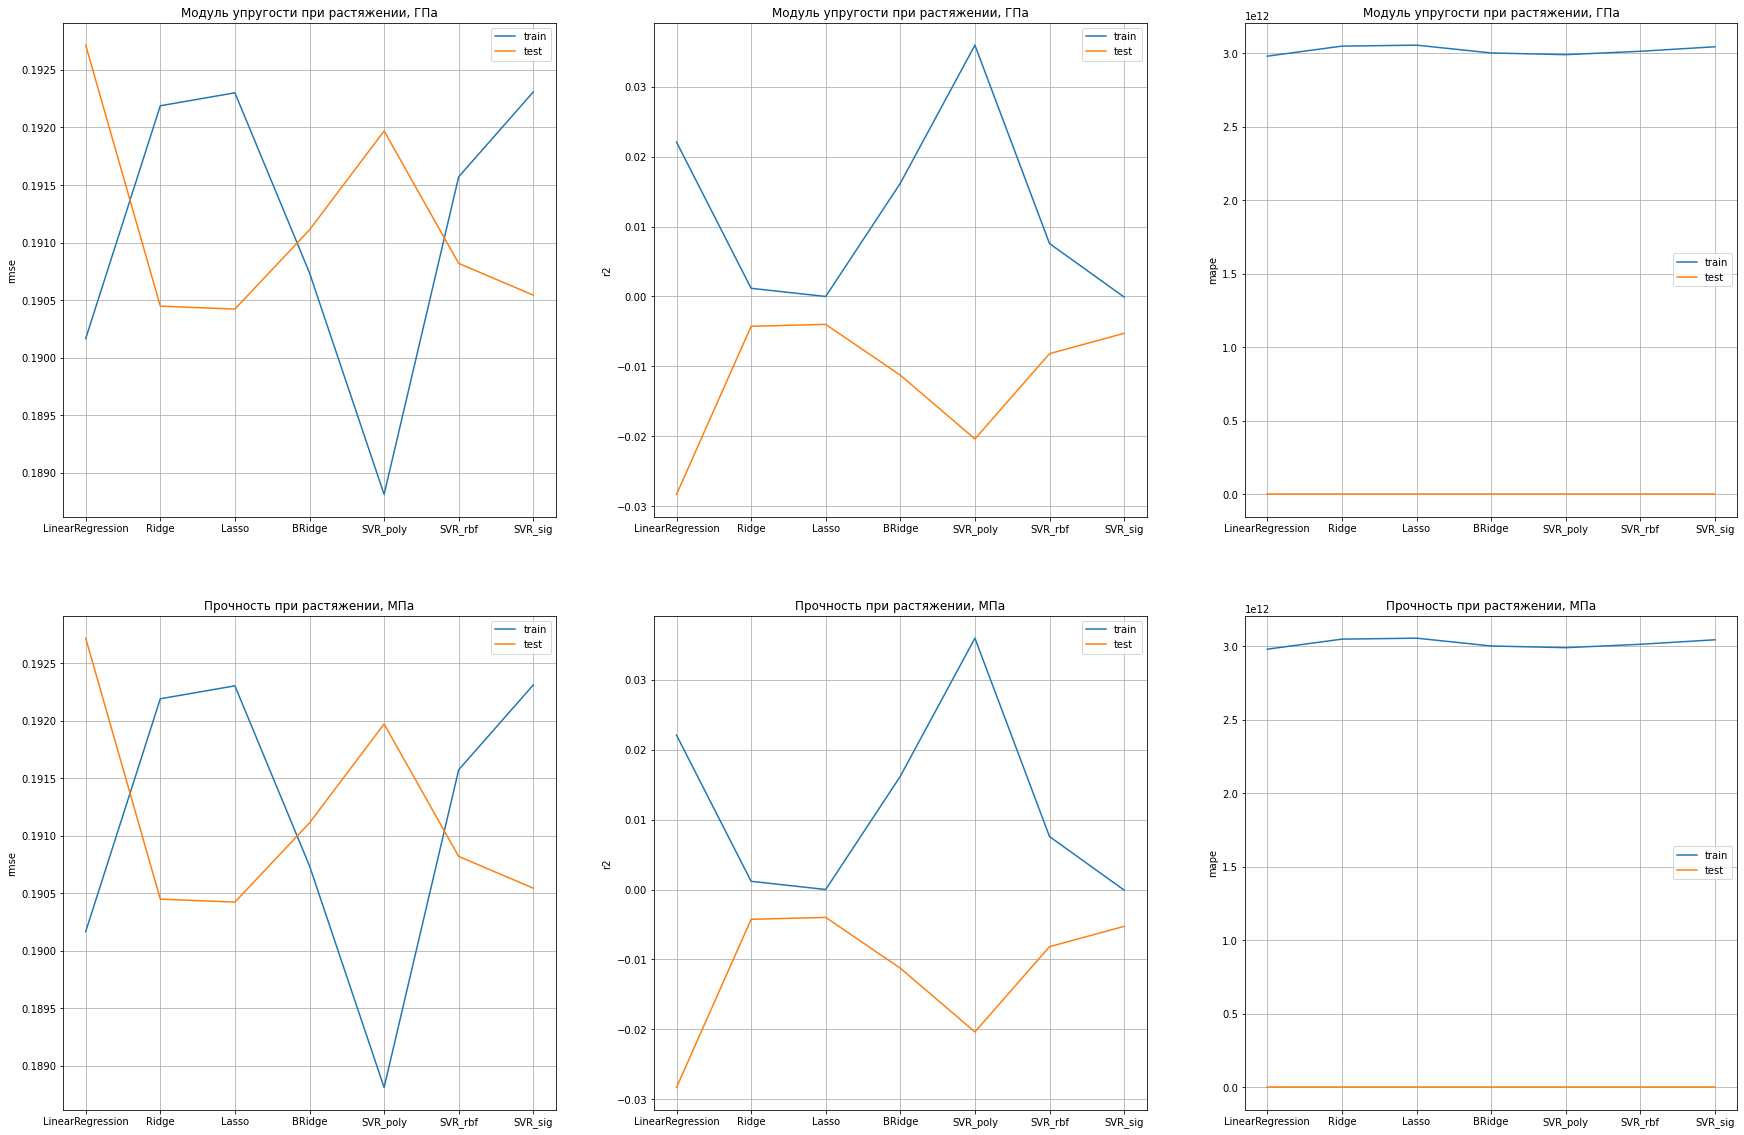

In [43]:
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
plot_met(staty_opt_tr, staty_opt_test, Ytest, 0, 0)
plt.subplot(2,3,2)
plot_met(staty_opt_tr, staty_opt_test, Ytest, 0, 1)
plt.subplot(2,3,3)
plot_met(staty_opt_tr, staty_opt_test, Ytest, 0, 2)
plt.subplot(2,3,4)
plot_met(statp_opt_tr, statp_opt_test, Ytest, 1, 0)
plt.subplot(2,3,5)
plot_met(statp_opt_tr, statp_opt_test, Ytest, 1, 1)
plt.subplot(2,3,6)
plot_met(statp_opt_tr, statp_opt_test, Ytest, 1, 2)

# нейросеть для прогнозирования модуля упругости и прочности

In [44]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

In [45]:
print(staty)

                      rmse         r2      mape
LinearRegression  0.192716  -0.028337  0.554830
Ridge             0.192549  -0.026563  0.554193
Lasso             0.190421  -0.003994  0.541692
BRidge            0.190741  -0.007370  0.544837
SVR_poly          0.231073  -0.478430  0.645047
SVR_rbf           0.207770  -0.195272  0.599525
SVR_sig           1.293042 -45.294149  2.112617


In [46]:
Xtrn.shape[1]

10

[[ 2.04777198e-01  1.91833472e-01]
 [-1.61084952e-01 -6.42645186e-02]
 [ 6.50105555e-01  8.03803304e+12]]


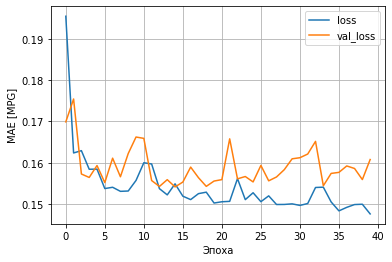

In [47]:
#dfc = df.copy()
#train = dfc.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',  'Соотношение матрица-наполнитель'])
#y = dfc[['Модуль упругости при растяжении, ГПа',  'Прочность при растяжении, МПа']]

def build_and_compile_model(size_input, out):
    model = keras.Sequential([
      layers.Input(shape=(size_input,)),
      layers.Dense(164, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(out)])
#mean_absolute_error'MeanSquaredError'
    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
    return model

#Ytrn_norm = scaler.fit_transform(Ytrn)
#X = np.array(Xtrn)
#X_normalizer = layers.Normalization(input_shape=[Xtrn.shape[1],], axis=-1)
#X_normalizer.adapt(X)
dnn = build_and_compile_model(Xtrn.shape[1], 2)

history = dnn.fit(
    Xtrn.values,
    Ytrn.values,
    epochs=40,
    verbose=0,
    validation_split = 0.2)

#y_test_norm = scaler.fit_transform(Ytest)
pred = dnn.predict(Xtest.values)
plot_loss(history)

m = get_metric(Ytest, pred)
name = 'neuro_2lay'
staty.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
statp.loc[name, ['rmse', 'r2', 'mape']] = m[:,1]
#plt.subplot(2,1,1)
#plt.title(Ytest.columns[0])
#plt.scatter(y_test_norm[:,0], pred[:,0], label = name)
#plt.ylabel('Прогноз')
#plt.xlabel('Тест')
#plt.legend()
#plt.grid(True)
print(m)

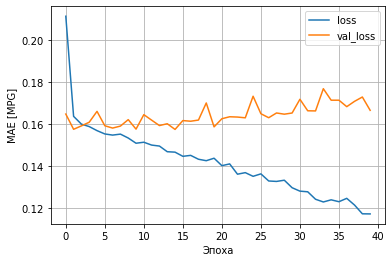

In [50]:
def build_and_compile_model_3(size_input, out):
    model = keras.Sequential([
      layers.Input(shape=(size_input,)),
      layers.Dense(100, activation='relu'),
      layers.Dense(200, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(200, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(out)
    ])
    #10 5 3 2 5
#mean_absolute_error'MeanSquaredError''mean_squared_error
    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn3 = build_and_compile_model_3(Xtrn.shape[1],2)

history2 = dnn3.fit(
    Xtrn.values,
    Ytrn.values,
    epochs=40,
    verbose=0,
    validation_split = 0.2)

plot_loss(history2)

#yt = scaler.fit_transform(Ytest)
pred = dnn3.predict(Xtest.values)
m = get_metric(Ytest, pred)
name = 'neuro_5lay'
staty.loc[name, ['rmse', 'r2', 'mape']] = m[:,0]
statp.loc[name, ['rmse', 'r2', 'mape']] =m[:,1]

In [51]:
staty.loc['neuro_2lay']

rmse    0.204777
r2     -0.161085
mape    0.650106
Name: neuro_2lay, dtype: float64

In [52]:
  
    staty_opt_test.loc['neuro_2lay', ['rmse', 'r2', 'mape']] = staty.loc['neuro_2lay']
    statp_opt_test.loc['neuro_2lay', ['rmse', 'r2', 'mape']] = statp.loc['neuro_2lay']
    staty_opt_test.loc['neuro_5lay', ['rmse', 'r2', 'mape']] = staty.loc['neuro_5lay']
    statp_opt_test.loc['neuro_5lay', ['rmse', 'r2', 'mape']] = statp.loc['neuro_5lay']
    m = acc(dnn, Xtrn, Ytrn)
    staty_opt_tr.loc['neuro_2lay', ['rmse', 'r2', 'mape']] = m[:,0]
    statp_opt_tr.loc['neuro_2lay', ['rmse', 'r2', 'mape']] =m[:,1]
    m = acc(dnn3, Xtrn, Ytrn)
    staty_opt_tr.loc['neuro_5lay', ['rmse', 'r2', 'mape']] = m[:,0]
    statp_opt_tr.loc['neuro_5lay', ['rmse', 'r2', 'mape']] =m[:,1]    

In [53]:
staty_opt_tr, staty_opt_test

(                      rmse            r2          mape
 LinearRegression  0.190165  2.209549e-02  2.978570e+12
 Ridge             0.192189  1.171204e-03  3.046742e+12
 Lasso             0.192302 -4.440892e-16  3.053279e+12
 BRidge            0.190736  1.621341e-02  3.000282e+12
 SVR_poly          0.188810  3.598376e-02  2.988661e+12
 SVR_rbf           0.191571  7.578997e-03  3.011645e+12
 SVR_sig           0.192309 -8.141302e-05  3.042315e+12
 neuro_2lay        0.198734 -6.802298e-02  3.133259e+12
 neuro_5lay        0.164271  2.702791e-01  2.265976e+12,
                       rmse        r2      mape
 LinearRegression  0.192716 -0.028337  0.554830
 Ridge             0.190447 -0.004265  0.542010
 Lasso             0.190421 -0.003994  0.541692
 BRidge            0.191110 -0.011270  0.547360
 SVR_poly          0.191970 -0.020392  0.549338
 SVR_rbf           0.190818 -0.008186  0.539010
 SVR_sig           0.190542 -0.005274  0.539882
 neuro_2lay        0.204777 -0.161085  0.650106
 neuro_

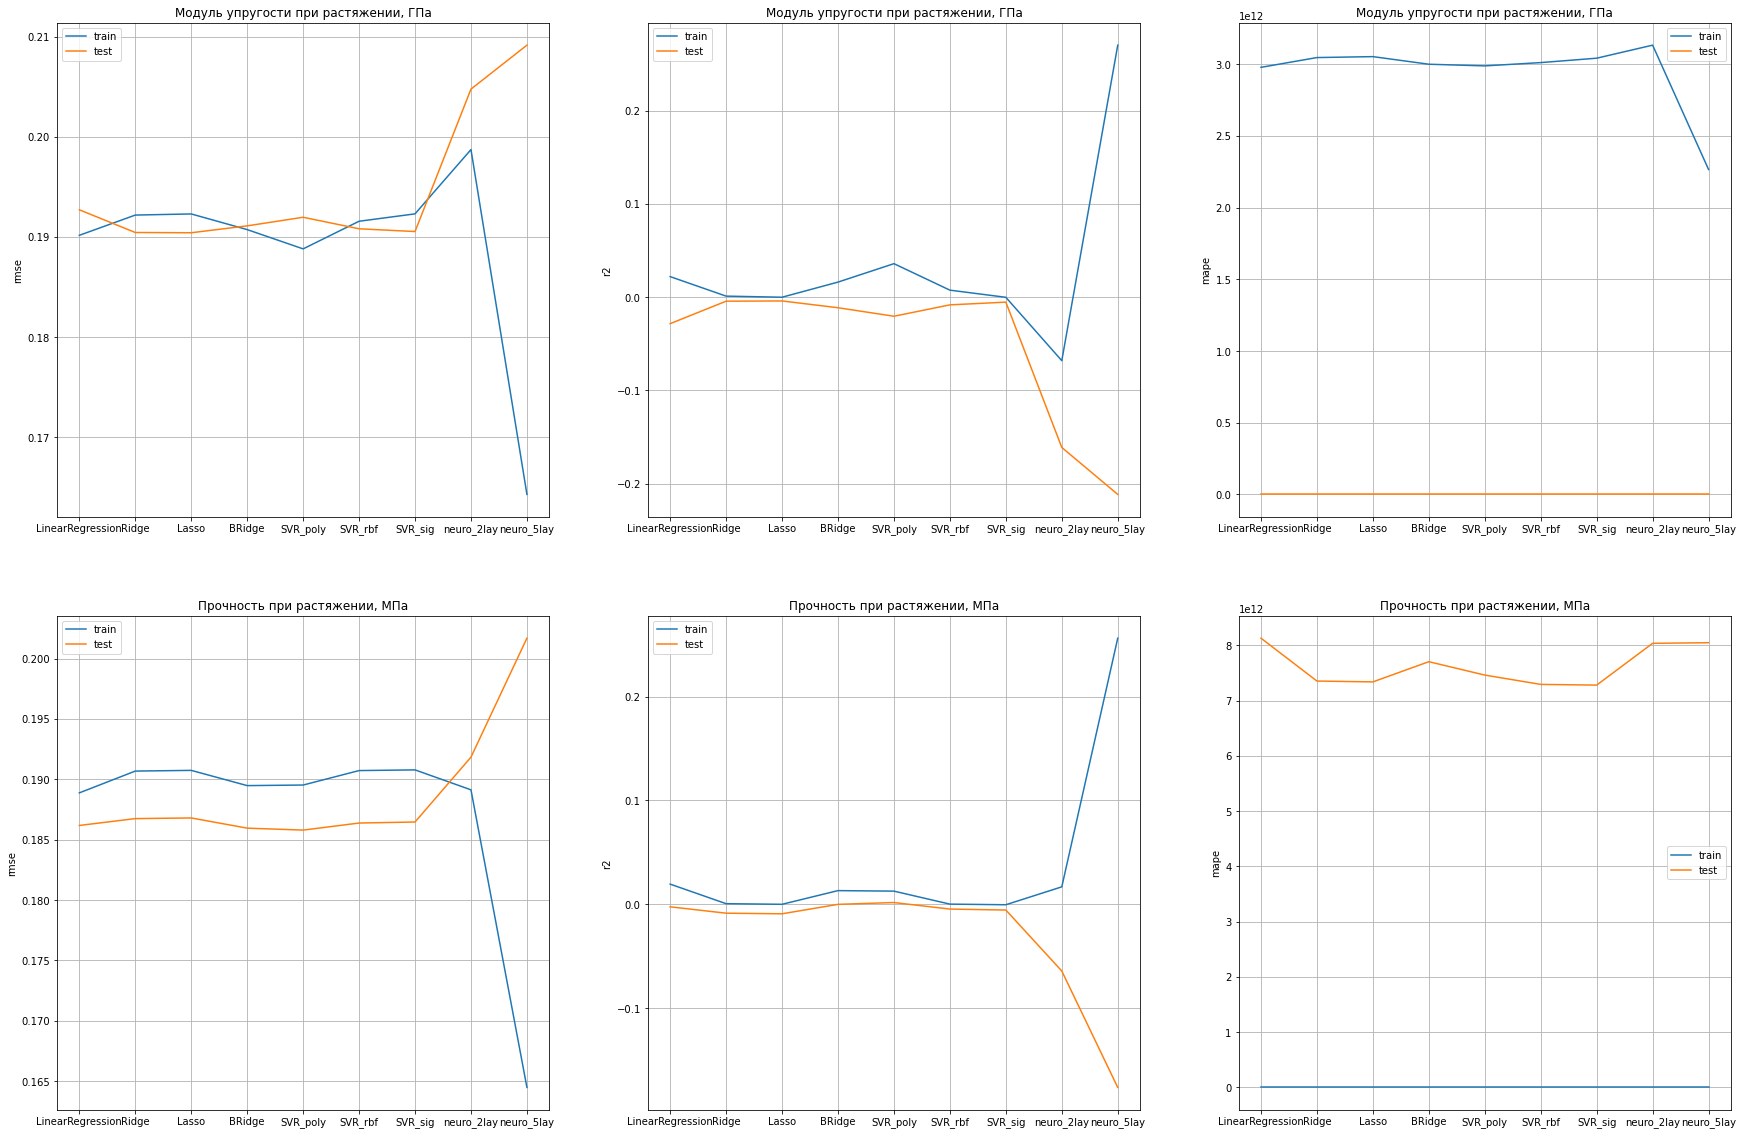

In [62]:
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
plot_met(staty_opt_tr, staty_opt_test, Ytest, 0, 0)
plt.subplot(2,3,2)
plot_met(staty_opt_tr, staty_opt_test, Ytest, 0, 1)
plt.subplot(2,3,3)
plot_met(staty_opt_tr, staty_opt_test, Ytest, 0, 2)
plt.subplot(2,3,4)
plot_met(statp_opt_tr, statp_opt_test, Ytest, 1, 0)
plt.subplot(2,3,5)
plot_met(statp_opt_tr, statp_opt_test,  Ytest, 1, 1)
plt.subplot(2,3,6)
plot_met(statp_opt_tr, statp_opt_test, Ytest, 1, 2)

In [55]:
staty_opt_tr

,rmse,r2,mape
LinearRegression,0.190165,2.209549e-02,2.978570e+12
Ridge,0.192189,1.171204e-03,3.046742e+12
Lasso,0.192302,-4.440892e-16,3.053279e+12
BRidge,0.190736,1.621341e-02,3.000282e+12
SVR_poly,0.188810,3.598376e-02,2.988661e+12
SVR_rbf,0.191571,7.578997e-03,3.011645e+12
SVR_sig,0.192309,-8.141302e-05,3.042315e+12
neuro_2lay,0.198734,-6.802298e-02,3.133259e+12
neuro_5lay,0.164271,2.702791e-01,2.265976e+12


In [77]:
staty_opt_test

,rmse,r2,mape
LinearRegression,0.192716,-0.028337,0.554830
Ridge,0.190447,-0.004265,0.542010
Lasso,0.190421,-0.003994,0.541692
BRidge,0.191110,-0.011270,0.547360
SVR_poly,0.191970,-0.020392,0.549338
SVR_rbf,0.190818,-0.008186,0.539010
SVR_sig,0.190542,-0.005274,0.539882
neuro_2lay,0.204777,-0.161085,0.650106
neuro_5lay,0.209170,-0.211436,0.588529


In [60]:
statp_opt_tr

,rmse,r2,mape
LinearRegression,0.188877,1.942868e-02,0.661072
Ridge,0.190682,5.949016e-04,0.670638
Lasso,0.190739,6.661338e-16,0.670785
BRidge,0.189478,1.317426e-02,0.665691
SVR_poly,0.189526,1.268189e-02,0.658537
SVR_rbf,0.190723,1.670448e-04,0.664672
SVR_sig,0.190780,-4.321323e-04,0.665315
neuro_2lay,0.189129,1.681328e-02,0.709847
neuro_5lay,0.164486,2.563325e-01,0.536342


In [61]:
statp_opt_test

,rmse,r2,mape
LinearRegression,0.186178,-0.002433,8.131257e+12
Ridge,0.186746,-0.008566,7.355348e+12
Lasso,0.186801,-0.009154,7.339980e+12
BRidge,0.185956,-0.000046,7.705475e+12
SVR_poly,0.185795,0.001687,7.463371e+12
SVR_rbf,0.186378,-0.004598,7.294553e+12
SVR_sig,0.186465,-0.005528,7.281814e+12
neuro_2lay,0.191833,-0.064265,8.038033e+12
neuro_5lay,0.201686,-0.176398,8.049151e+12


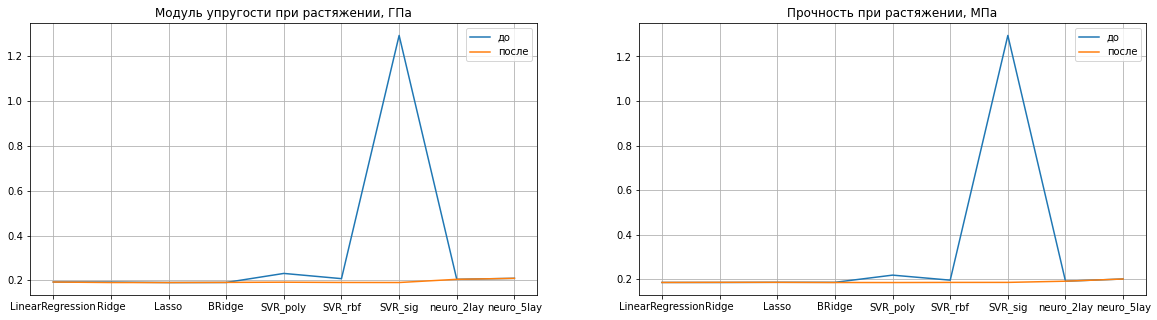

In [92]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.title(Ytest.columns[0])
plt.plot(staty.iloc[:,0], label = 'до')
plt.plot(staty_opt_test.iloc[:,0], label = 'после')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.title(Ytest.columns[1])
plt.plot(statp.iloc[:,0], label = 'до')
plt.plot(statp_opt_test.iloc[:,0], label = 'после')
plt.legend()
plt.grid(True)

# соотношение матрица-наполнитель

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 164)               2132      
                                                                 
 dense_10 (Dense)            (None, 64)                10560     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,757
Trainable params: 12,757
Non-trainable params: 0
_________________________________________________________________


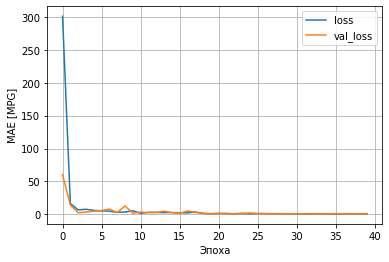

In [57]:
dfc = df.copy()
y = dfc.pop('Соотношение матрица-наполнитель')
Xtrn1, Xtest1, Ytrn1, Ytest1 = train_test_split(dfc, y, test_size=0.3)
#X = np.array(Xtrn)
#X_normalizer = layers.Normalization(input_shape=[Xtrn.shape[1],], axis=-1)
#X_normalizer.adapt(X)
dnns = build_and_compile_model(Xtrn1.shape[1], 1)
dnns.summary()

historym = dnns.fit(
    Xtrn1.values,
    Ytrn1.values,
    epochs=40,
    verbose=0,
    validation_split = 0.2)
plot_loss(historym)

In [122]:
dnns.save("models/my_model")

INFO:tensorflow:Assets written to: models/my_model\assets


(0.0, 10.0)

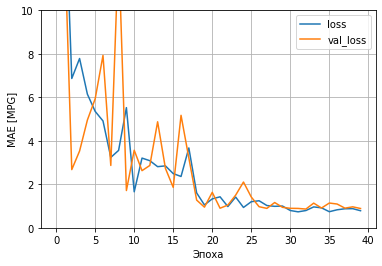

In [63]:
plot_loss(historym)
plt.ylim([0, 10])

In [58]:
pred = dnns.predict(Xtest1.values)
m = get_metric(Ytest1, pred)
statm = pd.DataFrame()
statm.loc["2 слоя", ['rmse', 'r2', 'mape']] = m[:,0]
statm

,rmse,r2,mape
2 слоя,0.98241,-0.083571,0.351185


In [65]:
dnn3s = build_and_compile_model_3(Xtrn1.shape[1], 1)
historym2 = dnn3s.fit(
    Xtrn1.values,
    Ytrn1.values,
    epochs=40,
    verbose=0,
    validation_split = 0.2)
pred = dnn3s.predict(Xtest1.values)
m = get_metric(Ytest1, pred)

statm.loc["5 слоев", ['rmse', 'r2', 'mape']] = m[:,0]
statm

,rmse,r2,mape
2 слоя,0.982410,-0.083571,0.351185
5 слоев,0.984007,-0.087096,0.350226


(0.0, 10.0)

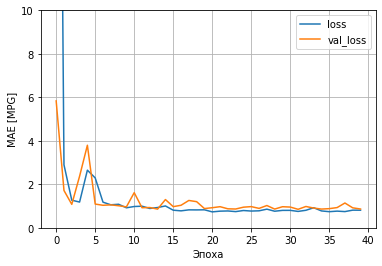

In [67]:
plot_loss(historym2)
plt.ylim([0, 10])

In [75]:
    statm_opt_tr = pd.DataFrame()
    m = acc(dnns, Xtrn1, Ytrn1)
    statm_opt_tr.loc['2слоя', ['rmse', 'r2', 'mape']] = m[:,0]
    m = acc(dnn3s, Xtrn1, Ytrn1)
    statm_opt_tr.loc['5слоев', ['rmse', 'r2', 'mape']] = m[:,0]

In [76]:
statm_opt_tr

,rmse,r2,mape
2слоя,0.923564,-0.055970,0.334806
5слоев,0.924175,-0.057367,0.335938


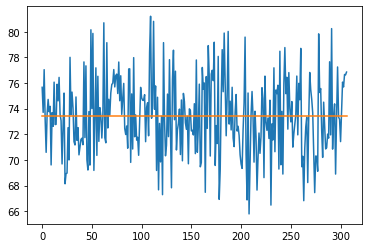

In [108]:
    model_best_Lasso.fit(Xtest, Ytest)
    pred = model.predict(Xtest)
    yy = Ytest.iloc[:,0]#*(df['Модуль упругости при растяжении, ГПа'].max()-df['Модуль упругости при растяжении, ГПа'].min())+df['Модуль упругости при растяжении, ГПа'].min()
    pred = pred*(df['Модуль упругости при растяжении, ГПа'].max()-df['Модуль упругости при растяжении, ГПа'].min())+df['Модуль упругости при растяжении, ГПа'].min()
    plt.plot(range(Ytest.iloc[:,0].shape[0]), yy)
    plt.plot(pred)

In [113]:
m = get_metric(yy, pred)
m

array([[ 3.01483230e+00],
       [-3.04354750e-05],
       [ 3.31887749e-02]])

In [121]:
    model_best_SVRpoly_p.fit(Xtest, Ytest.iloc[:,1])
    pred = model.predict(Xtest)
    yy1 = Ytest.iloc[:,1]*(df['Прочность при растяжении, МПа'].max()-df['Прочность при растяжении, МПа'].min())+df['Прочность при растяжении, МПа'].min()
    pred = pred*(df['Прочность при растяжении, МПа'].max()-df['Прочность при растяжении, МПа'].min())+df['Прочность при растяжении, МПа'].min()
    m = get_metric(yy1, pred)
    m[0]

array([457.82306878])